In [1]:
import csv
import matplotlib.pyplot as plt
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.optimizers import adam
from keras.utils import np_utils
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
import random
from numpy import *
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from keras import backend as K
from keras.layers import Conv2D
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
results = []
with open("dataset.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        results.append(row)
        
results = np.array(results)
results[results < 0] = 0

print(results)

[[952. 959. 952. ...   0.   0.   0.]
 [952. 959. 952. ...   0.   0.   0.]
 [952. 959. 952. ...   0.   0.   0.]
 ...
 [946. 950. 950. ...   4.   1.  56.]
 [958. 998. 956. ...   2.   0.   0.]
 [958. 997. 956. ...   2.   0.   0.]]


In [3]:
img_array = results
print(img_array.shape)

(206, 50)


In [4]:
random.shuffle(img_array)

In [5]:
X = []
y = []
X2 = []
Y2 = []
for img in img_array:
    X.append(img[24:48].reshape(6, 4, 1))
    y.append(img[48])
    X2.append(img[24:48].reshape(6, 4, 1))
    Y2.append(img[49])
X = np.array(X)

In [6]:
X = X.astype('float32')
X /= 255
Y = np_utils.to_categorical(y, 2)
print(shape(Y))

(206, 2)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05, random_state = 4)

In [8]:
batch_size = 16
nb_epochs = 100

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (2, 2), activation = tf.nn.relu, input_shape = (6, 4, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation = tf.nn.relu),
    tf.keras.layers.Dense(8, activation = tf.nn.relu),
    tf.keras.layers.Dense(4, activation = tf.nn.relu),
    tf.keras.layers.Dense(2,  activation = tf.nn.softmax)
])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 3, 1)           5         
_________________________________________________________________
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 443
Trainable params: 443
Non-trainable params: 0
__________________________________________________________

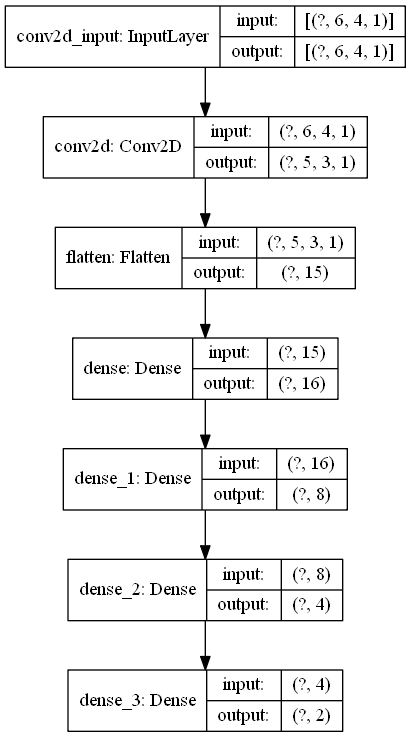

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='Body Detection.png', show_shapes=True, show_layer_names=True)

In [11]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))

Train on 195 samples, validate on 11 samples
Epoch 1/100
195/195 [==============================] - 1s 8ms/sample - loss: 0.6715 - accuracy: 0.5641 - val_loss: 0.6835 - val_accuracy: 0.3636
Epoch 2/100
195/195 [==============================] - 0s 262us/sample - loss: 0.6208 - accuracy: 0.7333 - val_loss: 0.6897 - val_accuracy: 0.3636
Epoch 3/100
195/195 [==============================] - 0s 472us/sample - loss: 0.5746 - accuracy: 0.7333 - val_loss: 0.7037 - val_accuracy: 0.3636
Epoch 4/100
195/195 [==============================] - 0s 426us/sample - loss: 0.5285 - accuracy: 0.7333 - val_loss: 0.7282 - val_accuracy: 0.3636
Epoch 5/100
195/195 [==============================] - 0s 426us/sample - loss: 0.4921 - accuracy: 0.7333 - val_loss: 0.7565 - val_accuracy: 0.3636
Epoch 6/100
195/195 [==============================] - 0s 338us/sample - loss: 0.4630 - accuracy: 0.7333 - val_loss: 0.7625 - val_accuracy: 0.3636
Epoch 7/100
195/195 [==============================] - 0s 385us/sample - lo

In [12]:
model.save("body.h5")

In [13]:
model = load_model('body.h5')

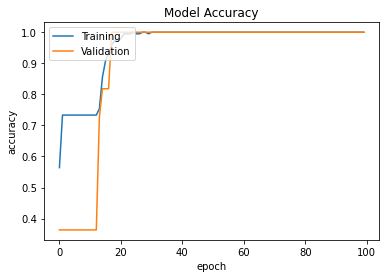

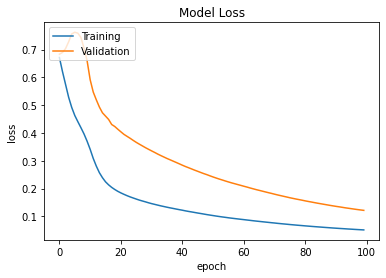

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [15]:
weights = model.get_weights()
print(weights)

[array([[[[ 8.6560535e-01]],

        [[ 1.1659973e+00]]],


       [[[-8.2128502e-02]],

        [[ 7.4706558e-04]]]], dtype=float32), array([-0.02502301], dtype=float32), array([[-0.03517102,  0.0625345 ,  0.6227157 , -0.24076726,  0.09323316,
         0.1972554 , -0.44740275,  0.31032482,  0.14804041, -0.1880812 ,
         0.256694  , -0.21703291, -0.42963538, -0.07286245,  0.00242343,
         0.49012965],
       [ 0.42456707,  0.23796897, -0.02499806,  0.6392699 , -0.28160164,
         0.3210014 ,  0.288898  ,  0.32561725,  0.09856213,  0.33730426,
        -0.31699848,  0.10275338,  0.18038563,  0.01307109,  0.40081584,
         0.01822795],
       [ 0.19347472,  0.6107494 ,  0.36932236,  0.460592  ,  0.05406997,
         0.19859457,  0.23764654, -0.03761382, -0.24832281,  0.07433504,
        -0.01517984,  0.22575153,  0.18750764,  0.18284781,  0.5627307 ,
         0.6972361 ],
       [ 0.09751187,  0.26150578,  0.5029907 ,  0.61203885,  0.09916814,
         0.08298401, -0.2028633

In [16]:
weight_file = open("bodyOutput.txt", "w")

for w in weights[0:]:
    weight_file.write("{")

    if(len(w.shape) == 2):
        for i in np.array(w):
            weight_file.write("{")

            for j in np.array(i):
                weight_file.write(str(j) + ", ")
            
            weight_file.write("}, \n")
    
    else:
        for j in np.array(w):
            weight_file.write(str(j) + ", ")

    weight_file.write("}\n\n")

weight_file.flush()
weight_file.close()

In [17]:
X_test = [3,63,0,0,30,13,31,2,55,0,32,11,14,40,66,8,29,29,33,4,0,5,5,0]

In [18]:
X_test = np.array(X_test)
X_test = X_test.reshape(1, 6, 4, 1)
X_test[X_test < 0] = 0

In [19]:
X_test = X_test.astype('float32')
X_test /= 255

In [20]:
ynew = model.predict(X_test)
ynew = np.argmax(ynew)

print(ynew)

1


In [21]:
inp = model.input
outputs = [layer.output for layer in model.layers]
functor = K.function([inp, K.learning_phase()], outputs)

In [22]:
layer_outs = functor([X_test, 1])
print(layer_outs)

[array([[[[0.2636064 ],
         [0.18473631],
         [0.        ]],

        [[0.11854192],
         [0.1609483 ],
         [0.07907844]],

        [[0.15728435],
         [0.10860869],
         [0.11266655]],

        [[0.19614682],
         [0.40330234],
         [0.22497967]],

        [[0.20603664],
         [0.22271645],
         [0.10367631]]]], dtype=float32), array([[0.2636064 , 0.18473631, 0.        , 0.11854192, 0.1609483 ,
        0.07907844, 0.15728435, 0.10860869, 0.11266655, 0.19614682,
        0.40330234, 0.22497967, 0.20603664, 0.22271645, 0.10367631]],
      dtype=float32), array([[0.5621964 , 0.3465819 , 0.61412096, 0.7294105 , 0.        ,
        0.5677146 , 0.        , 0.7831598 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1926666 ,
        0.6283009 ]], dtype=float32), array([[1.6713449, 1.9952999, 1.5300744, 2.0301201, 0.       , 1.726245 ,
        1.440575 , 0.       ]], dtype=float32), array([[0.      , 0.      , 7.39745

In [23]:
from keras.layers import Dense, Flatten

In [24]:
x, y = np.array(X2), np.array(Y2)
print(x.shape)

(206, 6, 4, 1)


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.05, random_state = 4)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 3, 1)           5         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

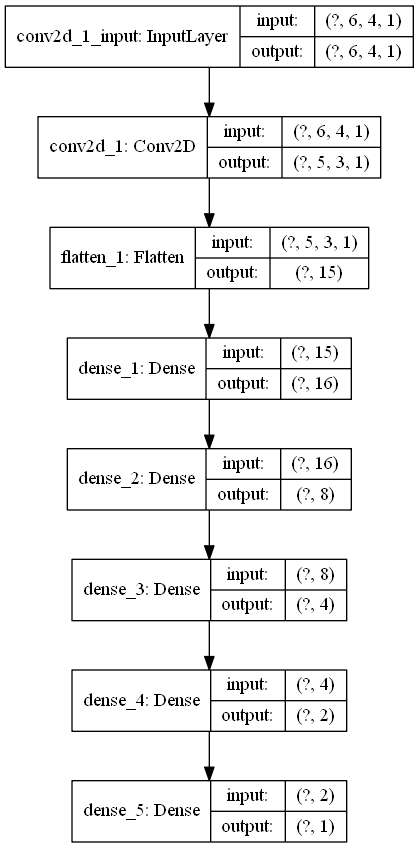

In [26]:
model = Sequential()
model.add(Conv2D(1, 2, activation="relu", input_shape = (6, 4, 1)))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
 
model.summary()
plot_model(model, to_file='Weight Estimation.png', show_shapes=True, show_layer_names=True)

In [27]:
history = model.fit(xtrain, ytrain, batch_size = 12, epochs = 1000, verbose = 1, validation_data = (xtest, ytest))

Train on 195 samples, validate on 11 samples
Epoch 1/1000
195/195 [==============================] - 0s 2ms/step - loss: 2542.9031 - val_loss: 1258.0692
Epoch 2/1000
195/195 [==============================] - 0s 390us/step - loss: 2275.4382 - val_loss: 1176.2328
Epoch 3/1000
195/195 [==============================] - 0s 431us/step - loss: 1788.4901 - val_loss: 959.2032
Epoch 4/1000
195/195 [==============================] - 0s 400us/step - loss: 1026.3692 - val_loss: 637.2090
Epoch 5/1000
195/195 [==============================] - 0s 451us/step - loss: 467.0578 - val_loss: 391.8103
Epoch 6/1000
195/195 [==============================] - 0s 451us/step - loss: 358.7856 - val_loss: 355.5341
Epoch 7/1000
195/195 [==============================] - 0s 462us/step - loss: 282.2923 - val_loss: 312.8063
Epoch 8/1000
195/195 [==============================] - 0s 533us/step - loss: 229.3073 - val_loss: 256.5804
Epoch 9/1000
195/195 [==============================] - 0s 415us/step - loss: 198.4994 

In [28]:
model.save("weight.h5")

In [29]:
model = load_model('weight.h5')

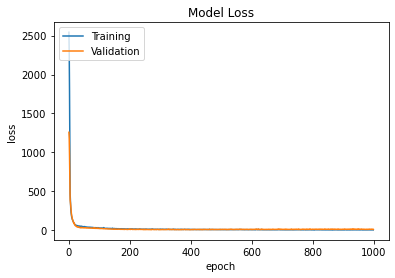

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [31]:
weights = model.get_weights()
print(weights)

[array([[[[ 0.65161675]],

        [[-0.16675755]]],


       [[[ 0.00315606]],

        [[ 0.69970435]]]], dtype=float32), array([-0.773885], dtype=float32), array([[ 0.46744868,  0.05994426, -0.17011048,  0.37188452,  0.3013428 ,
         0.06523109, -0.57859623, -0.29059312, -0.1362847 , -0.04587264,
        -0.29503492,  0.06078421, -0.1083147 ,  0.19754682, -0.40495107,
         0.00776793],
       [-0.05411827, -0.09874083,  0.32264307,  0.26200604,  0.06397072,
        -0.22831829,  0.15394075,  0.32778722,  0.11932656, -0.36925653,
        -0.19724338, -0.01508927,  0.18378168, -0.11816796, -0.04768357,
        -0.07793126],
       [ 0.21166056,  0.5471797 ,  0.00915914,  0.1109819 , -0.12089188,
         0.01108522, -0.45063585, -0.14665204, -0.2118191 , -0.9856254 ,
         0.03115672, -0.5076098 ,  0.21286362,  0.04294927,  0.02027495,
         0.44653985],
       [-0.23571153, -0.3991666 ,  0.24225463,  0.04367596,  0.2003232 ,
         0.19955494, -0.01225121, -0.15532054

In [32]:
weight_file = open("weightOutput.txt", "w")

for w in weights[0:]:
    weight_file.write("{")

    if(len(w.shape) == 2):
        for i in np.array(w):
            weight_file.write("{")

            for j in np.array(i):
                weight_file.write(str(j) + ", ")
            
            weight_file.write("}, \n")
    
    else:
        for j in np.array(w):
            weight_file.write(str(j) + ", ")
    
    weight_file.write("}\n\n")

weight_file.flush()
weight_file.close()

In [33]:
X_test = [3,63,0,0,30,13,31,2,55,0,32,11,14,40,66,8,29,29,33,4,0,5,5,0]

In [34]:
X_test = np.array(X_test)
X_test = X_test.reshape(1, 6, 4, 1)
X_test[X_test < 0] = 0

In [35]:
ynew = model.predict(X_test)
print(ynew)

[[37.412174]]


In [36]:
inp = model.input
outputs = [layer.output for layer in model.layers]
functor = K.function([inp, K.learning_phase()], outputs)

In [37]:
layer_outs = functor([X_test, 1])
print(layer_outs)

[array([[[[ 0.       ],
         [62.009834 ],
         [ 0.7233614]],

        [[16.780352 ],
         [24.918186 ],
         [26.89046  ]],

        [[63.097397 ],
         [40.196606 ],
         [24.049452 ]],

        [[22.0614   ],
         [37.466557 ],
         [43.801727 ]],

        [[16.785551 ],
         [16.134302 ],
         [20.078217 ]]]], dtype=float32), array([[ 0.       , 62.009834 ,  0.7233614, 16.780352 , 24.918186 ,
        26.89046  , 63.097397 , 40.196606 , 24.049452 , 22.0614   ,
        37.466557 , 43.801727 , 16.785551 , 16.134302 , 20.078217 ]],
      dtype=float32), array([[ 0.        ,  0.        , 41.4227    , 20.575787  , 19.675518  ,
         0.        , 28.245207  , 72.87806   , 55.7546    ,  0.        ,
         0.        ,  0.        , 34.895164  , 16.627787  ,  0.        ,
         0.14940047]], dtype=float32), array([[66.14436 ,  0.      , 71.84172 ,  0.      ,  0.      , 56.89303 ,
        40.896893,  0.      ]], dtype=float32), array([[47.542015, 

In [38]:
i = 0
correct = 0

for x in xtrain:
    x = x.reshape(1, 6, 4, 1)
    ynew = model.predict(x)
    
    if(abs(ytrain[i] - ynew) <= 5):
        correct += 1
    
    i += 1
    
accuracy = (correct / xtrain.shape[0])
print('Training Accuracy:', accuracy)

i = 0
correct = 0

for x in xtest:
    x = x.reshape(1, 6, 4, 1)
    ynew = model.predict(x)
    
    if(abs(ytest[i] - ynew) <= 5):
        correct += 1
    
    i += 1

accuracy = (correct / xtest.shape[0])
print('Validation Accuracy:', accuracy)

Training Accuracy: 0.9743589743589743
Validation Accuracy: 0.7272727272727273
